# Lab 3: CNNs and Deep Learning 
**(version 1.0)**

### TBMI26/732A55 Neural Networks and Learning Systems 2020
### Michael Felsberg
---

#### *Hint: Use the provided test cases to check if your solutions are valid.*

---
## 2D Convolution
It is widely used with 2D signals such as images. For the further steps, we often need to visualize an image and we define a shortcut for that:

In [8]:
from matplotlib import pyplot as plt

def visualize(img, title=''):
    plt.imshow(img,'gray')
    plt.colorbar()
    plt.title(title)
    plt.show()
    print('Image size:', img.shape)

---
**Task 1:** Convolution can be performed in 2D using the function `scipy.signal.convolove2d()`. Use this function to generate a 2D kernel of size $33\times33$ by five times cascading 2D convolutions of $H$ with itself, starting with $H = \begin{array}{|c|c|}
      \hline
      1 & 1 \\
      \hline
      1 & 1 \\
      \hline
    \end{array}/4$.   
*Visualize* the kernel using `visualize` function defined above.   

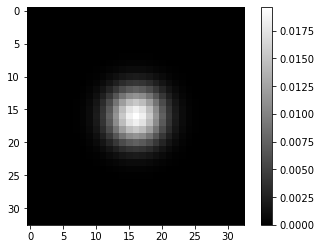

Image size: (33, 33)


In [9]:
# YOUR CODE HERE'
import scipy.signal

H = [[1/4,1/4],[1/4,1/4]]

for i in range(5):
    H = scipy.signal.convolve2d(H,H)
    #print(H)
    
visualize(H)

In [3]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(H.sum().round()==1)

---
**Task 2:** Now, load the image `'MR15^044.JPG'` (a sample from ImageNet), **sum** its RGB-channels, **normalize** it to the range [0,1], and convolve it with $H$ from task 3 under the options `'valid'` and `'same'`. 

What differences do you observe regarding the size of the output?



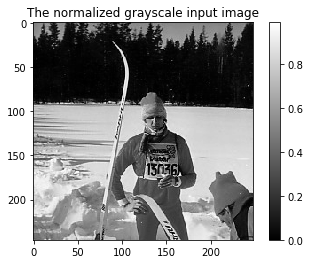

Image size: (246, 248)


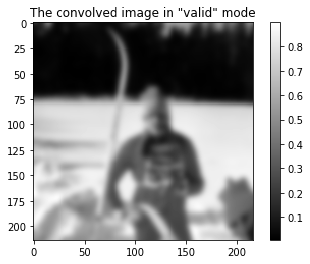

Image size: (214, 216)


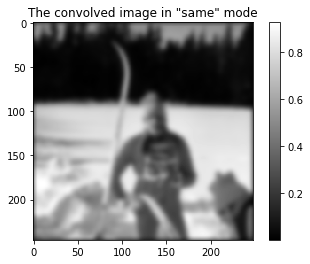

Image size: (246, 248)


In [4]:
# YOUR CODE HERE
import matplotlib.image as mpimg

img=mpimg.imread('MR15^044.JPG')
imgplot = plt.imshow(img)

imgsum = img.sum(axis=2)

img_gray = imgsum/(255*3)

omg_sc_valid = scipy.signal.convolve2d(img_gray,H,'valid')
omg_sc_same = scipy.signal.convolve2d(img_gray,H,'same')


visualize(img_gray, 'The normalized grayscale input image')      
visualize(omg_sc_valid, 'The convolved image in "valid" mode')
visualize(omg_sc_same, 'The convolved image in "same" mode')

In [5]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(img_gray.max() == 1.0)
assert(omg_sc_valid.shape == (214, 216))
assert(omg_sc_same.shape == (246, 248))

AssertionError: 

---
## Strided convolution

In strided convolution, samples are removed based on the stride. According to the Nyquist theorem, this can generate aliasing artifacts.  

**Task 3:** Visualize the input image and the second output image from task 4, `omg_sc_same`, while only keping every *fifth* row and column. 

*Hint*: Use Python extended slicing, read this guid on [extended slices](https://docs.python.org/2.3/whatsnew/section-slices.html)


In [ ]:
# YOUR CODE HERe
img_gray_ds = img_gray[::5]
img_gray_ds = img_gray_ds[:,0:len(img_gray_ds[1,:] ):5]

omg_sc_same_ds = omg_sc_same[::5]
omg_sc_same_ds = omg_sc_same_ds[:,0:len(omg_sc_same_ds[1,:] ):5]


visualize(img_gray_ds, 'Input image with stride of 5')
visualize(omg_sc_same_ds, 'Filtered input image with stride of 5')

What do you observe, in particular at the ski?

Since the original image is not blurred and has sharp edges, when we now take a small sample of all the pixels the downsampling is not as robust as when we do it on a blurred image(the filtered image). 

You can see that the ski in the original image with stride looks “pixely” and it is hard to see what it resembles since you got either very bright or very dark pixels on the ski. In the blurred one the pixels you get in your smaller sample is still influenced by nearby not shown pixels. 



## Convolution in PyTorch
PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing. It is primarily developed by Facebook's AI Research lab.

We will start by utilizing PyTorch to perform convolution operations in 2D.

---
**Task 4:** Apply the cascaded $33\times33$ filter from task 1 to the image using a `torch.nn.Conv2d` layer. 

Compare the results from *Scipy* in task 2 and *PyTorch* in this task by subtracting the output images.

In [ ]:
# YOUR CODE HERE
import torch
import numpy as np
import torch.nn.functional as F


#conv = torch.nn.Conv2d(1,1,kernel_size=33)

H_tensor = torch.from_numpy(H)
H_tensor = H_tensor.unsqueeze(0)
H_tensor = H_tensor.unsqueeze(0)

print(H_tensor.shape)
#conv.weight = H_tensor

input = torch.from_numpy(img_gray)
input = input.unsqueeze(0)
input = input.unsqueeze(0)


output = F.conv2d(input,H_tensor, padding=16)
print(conv.shape)


output = output.squeeze(0)
output = output.squeeze(0)
out_2d_np = np.asarray(output)




print(out_2d_np.shape)


# Hint: Convert the output tensor to numpy array
visualize(out_2d_np, 'Filtered image using PyTorch') 
diff = np.abs(out_2d_np-omg_sc_same)
visualize(diff, 'Diff. between Scipy and PyTorch')


In [ ]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(diff.mean()<1e-7)

---
**Task 5:** Repeat the previous task with stride 5. Compare with `omg_sc_same_ds` from task 3.

In [ ]:
# YOUR CODE HERE

output = F.conv2d(input,H_tensor,stride=5, padding=16)
print(conv.shape)


output = output.squeeze(0)
output = output.squeeze(0)
out_2d_s5_np = np.asarray(output)




print(out_2d_s5_np.shape)



# Hint: Convert the output tensor to numpy array
visualize(out_2d_s5_np, 'Filtered image using PyTorch with stride=5') 
diff_s5 = np.abs(out_2d_s5_np-omg_sc_same_ds)
visualize(diff_s5, 'Diff. between Scipy and PyTorch')

In [ ]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(diff_s5.mean()<1e-6)

---
**Task 6:** Repeat task 5 with stride of 5 and a $1\times1$ filter. Compare with `img_gray_ds` from task 3.

In [ ]:
# YOUR CODE HERE

input = torch.from_numpy(img_gray)
input = input.unsqueeze(0)
input = input.unsqueeze(0)

H = [1.0]
H = np.array(H)

H_tensor = torch.from_numpy(H)
H_tensor = H_tensor.unsqueeze(0)
H_tensor = H_tensor.unsqueeze(0)
H_tensor = H_tensor.unsqueeze(0)

print(input.shape)
print(H_tensor.shape)

output = F.conv2d(input,H_tensor, stride=5,padding=0,bias=None)



output = output.squeeze(0)
output = output.squeeze(0)
out_2d_s5_1_np = np.asarray(output)


print(out_2d_s5_1_np.shape)


# Hint: Convert the output tensor to numpy array
visualize(out_2d_s5_1_np, 'Filtered image using PyTorch with stride=5') 
diff_s5_1 = np.abs(out_2d_s5_1_np-img_gray_ds)
visualize(diff_s5_1, 'Diff. between Scipy and PyTorch')

In [ ]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(diff_s5_1.mean()<1e-7)

---
## Training a PyTorch Convolution layer

Now, we want the network to learn the convolution filter given the input and the filtered output.

**Task 7:** Considering the input image tensor `inp_2d` from task 4 as a *batch* and the filtered output `out_2d_t` as a label, use `torch.optim.SGD` to learn the the filter $H$.

**Hints**:
- Use the L1 loss from `torch.nn.functional.l1_loss`.
- Use a small learning rate.
- Detach `out_2d_t` from the model graph in task 4 to avoid errors.
- Iterate for 500 iterations.
- Clip the weights after each iteration to $[0, \infty[$ for stable convergence.
- Print the loss every 100 steps.

torch.Size([1, 1, 246, 248])
torch.Size([1, 1, 246, 248])
tensor(0.4919, grad_fn=<L1LossBackward>)
tensor(0.0565, grad_fn=<L1LossBackward>)
tensor(0.0153, grad_fn=<L1LossBackward>)
tensor(0.1064, grad_fn=<L1LossBackward>)
tensor(0.1093, grad_fn=<L1LossBackward>)


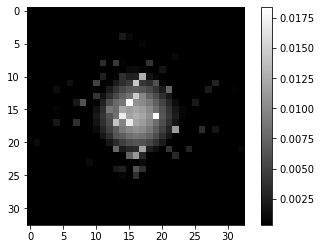

Image size: (33, 33)


In [7]:
# Define the model and the optimizer
# YOUR CODE HERE
import torch

inp_2d = torch.from_numpy(img_gray).unsqueeze(0).unsqueeze(0).float()


#print(inp_2d.shape)
out_2d_t = torch.from_numpy(omg_sc_same).unsqueeze(0).unsqueeze(0).float()
#print(out_2d_t.shape)

learning_rate = 0.001
nr_of_iter = 500

model_1layer = torch.nn.Conv2d(1,1,kernel_size=33,bias=False, padding=16)

optimizer = torch.optim.SGD(model_1layer.parameters(), lr=learning_rate)
loss_fn = torch.nn.functional.l1_loss

for i in range(0, nr_of_iter):
    
    optimizer.zero_grad()
    predictions = model_1layer(inp_2d)
    loss = loss_fn(predictions, out_2d_t)
    loss.backward()
    optimizer.step()
    
    model_1layer.weight.data.clamp_(0)
    
    
    if (i % 100) == 0:
        print(loss)


# Visualize the trained filter
visualize(model_1layer.weight[0,0,:,:].detach().cpu().numpy())

**Task 8**:
To make the transitiong to the next task easier, redo task 7 by defining a custom PyTorch module which includes only 1 convolution layer.  
You can follow this [tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#define-the-network).  
A custom module class inherits `torch.nn.Module` class and needs to have two mandatory functions:
- `__init__(self):` where you define layers included in your module.
- `forward(self, x):` where you define the inference steps of your network.

The built-in auto-differentiation module in PyTorch will keep track of the operations that you perform in the inference steps and calculates their derivatives when you back-propagate the loss function during training.

tensor(0.6825, grad_fn=<L1LossBackward>)
tensor(0.0551, grad_fn=<L1LossBackward>)
tensor(0.0147, grad_fn=<L1LossBackward>)
tensor(0.1132, grad_fn=<L1LossBackward>)
tensor(0.1167, grad_fn=<L1LossBackward>)


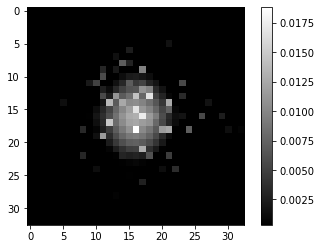

Image size: (33, 33)


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1,1,kernel_size=33,bias=False, padding=16)

    def forward(self, x):
        
        x = self.conv1(x)
        return x



net = Net()
""""
params = list(net.parameters())
print(len(params))
print(params[0].size()) 

input = inp_2d = torch.from_numpy(img_gray).unsqueeze(0).unsqueeze(0).float()
out = net(input)
print(out)

net.zero_grad()
out.backward(torch.randn(1, 10))
"""



inp_2d = torch.from_numpy(img_gray).unsqueeze(0).unsqueeze(0).float()

#print(inp_2d.shape)
out_2d_t = torch.from_numpy(omg_sc_same).unsqueeze(0).unsqueeze(0).float()
#print(out_2d_t.shape)

learning_rate = 0.001
nr_of_iter = 500


optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
loss_fn = torch.nn.functional.l1_loss

for i in range(0, nr_of_iter):
    
    optimizer.zero_grad()
    predictions = net(inp_2d)
    loss = loss_fn(predictions, out_2d_t)
    loss.backward()
    optimizer.step()
    
    net.conv1.weight.data.clamp_(0)
    
    
    if (i % 100) == 0:
        print(loss)




# Visualize the trained filter
visualize(net.conv1.weight[0,0,:,:].detach().cpu().numpy())
        

---
## Training a whole network
So far, we have experimented with training a single convolution layer. Now we try to train a whole network to perform the task of image classification on CIFAR-10 dataset.  
But first, make sure that CUDA is available by running the following command:

In [23]:
import torch
print("CUDA Available: ",torch.cuda.is_available())

CUDA Available:  True


**Task 9:** We will train on CIFAR10, which is readily available at `torchvision.datasets.CIFAR10`. 

Create a dataloader for the *training* and the *test* sets of CIFAR10 using `torch.utils.data.DataLoader` , then show some examples from the training set using `torchvision.utils.make_grid` and print out their labels. 

*Hints* :
- The `imshow` function for visualizing the images is provided below.
- Use `torchvision.transforms` to perform whitening on images (normalization using the mean and the standard deviation).
- Use a batch size of 64.

Files already downloaded and verified
Files already downloaded and verified


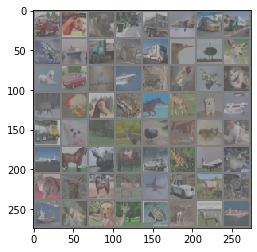

truck horse   dog truck truck plane   car truck plane  ship truck  deer truck  bird  bird  deer horse   car  bird  ship  frog  bird plane   cat  deer   dog horse  frog horse horse   dog  ship truck   dog  deer  deer  bird  deer  frog   cat plane horse  ship horse   car  frog plane   cat   cat  deer horse  deer plane   car horse  frog  ship   cat   dog  deer  frog  deer horse  ship
tensor(0.4099)


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms

def imshow(img):
    img = img * 0.2 + 0.5  # Un-Normalize, Change according to your normalization
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    return npimg.mean()

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# YOUR CODE HERE
batch_size = 64

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Show some random images
dataiter = iter(trainloader)
images, labels = dataiter.next()
grid_img = torchvision.utils.make_grid(images)
imshow(grid_img)

# Print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

print(grid_img.std())

In [34]:
### TEST CELL. PLEASE DON'T CHANGE ###
assert(grid_img.std()>0.8)

AssertionError: 

---
## Baseline Model
**Task 10:** Build the depicted LeNet5-inspired model using PyTorch standard components. Assume a **padding** with `same` mode for all convolution layers.   
Try to figure out the missing dimension at the first fully connected layer.
![architecture](arch.png)

In [106]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()        
        
        # Define the network
        self.conv1 = nn.Conv2d(3, 32, 3,padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(num_features=128)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        self.drop1 = nn.Dropout2d(p=0.05)
        self.conv5 = nn.Conv2d(128, 256, 3,padding=1)
        self.bn3 = nn.BatchNorm2d(num_features=256)
        self.conv6 = nn.Conv2d(256, 256, 3,padding=1)
        self.drop2 = nn.Dropout(p=0.1)
        self.fc1 = nn.Linear(4096, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.drop3 = nn.Dropout(p=0.1)
        self.fc3 = nn.Linear(512, 10)

        
     
    def forward(self, x):
        # Perform Inference   
       
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = F.relu(self.bn2(self.conv3(x)))
        x = self.drop1(F.max_pool2d(F.relu(self.conv4(x)),2))
        x = F.relu(self.bn3(self.conv5(x)))
        
        x = F.relu(self.conv6(x))
        #print(x.shape)
        x = F.max_pool2d(x,2)
        #print(x.shape)
        x = self.drop2(x)
        #print(x.shape)
        x = x.view(-1,4096)
        #print(x.shape)
        x = F.relu(self.fc1(x))
        x = self.drop3(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
                  
        return x
       
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = LeNet5().to(device)
print(device)

cuda:0


---
**Task 11:** Train the LeNet5 model for 40 epochs using a suitable batch size and display the result.

*Hints*:
- Define an optimizer, e.g. SGD optimizer.
- Define a suitable loss function.
- Iterate for 40 epochs and at each epoch calculate a running loss and accuracy on the training set.
- After each epoch, evaluate the model on the test set. You can achieve this by **completing** the `test` function below that performs *only* inference on the test set and calculates the accuracy.

In [51]:
# A function to plot the accuracy training history
def plot_model_history(history):
    plt.figure(0)
    plt.plot(history['train'],'r', lw=3)
    plt.plot(history['test'],'b', lw=3)
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Epoch number")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Test Accuracy")
    plt.legend(['Training','Test'])
    plt.grid(True)

# Test function that runs only inference
def test(model, testloader):
    correct = 0
    total = 0
 
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    
    print('Test Accuracy: %d %%' % (100 * correct / total))
    return correct / total

In [109]:
NUM_EPOCHS = 40
LR = 0.01

# Define a proper optimizer and a proper loss function
# YOUR CODE HERE
net = LeNet5()
optimizer = torch.optim.SGD(net.parameters(), lr=LR)
#loss_fn = torch.nn.functional.l1_loss
loss_fn = nn.CrossEntropyLoss()

acc_history = {'train':[], 'test':[]}


# Iterate for N epochs
for epoch in range(0, NUM_EPOCHS):
    print("EPOCH: ")
    print(epoch)
    
    for i, data in enumerate(trainloader, 0):
        print(i)
        
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        #print(outputs.shape)
        #print(labels.shape)
        
        #labels = labels.unsqueeze(1).unsqueeze(1).unsqueeze(1)
        #print(labels.shape)
        
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        net.conv1.weight.data.clamp_(0)
    
    acc_history.train = test(net, trainloader)
    acc_history.test = test(net, testloader)
    print(acc_history)
    
print('Finished Training!')

plot_model_history(acc_history)

# Let's quickly save our trained model:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

EPOCH: 
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162


KeyboardInterrupt: 

## == MANDATORY QUESTIONS END HERE ==

---

### Baseline + Decaying Learning Rate
In most papers, the learning rate is successively reduced in order to boost the final performance, e.g. divided by two after 20 and 30 epochs.  
**[EXTRA]**
**Task 12:** Define a suitable function and train the previous model with decaying learning rate. Plot the result and compare it to the baseline.

In [ ]:
def adjust_learning_rate(optimizer, epoch):    
    for param_group in optimizer.param_groups:
        lrate = param_group["lr"]
        # YOUR CODE HERE
        raise NotImplementedError()

In [ ]:
net_lr = LeNet5().to(device)

# Define a proper optimizer and a proper loss function
# YOUR CODE HERE
raise NotImplementedError()

acc_history_lr = {'train':[], 'test':[]}
# Iterate for N epochs
# YOUR CODE HERE
raise NotImplementedError()
print('Finished Training!')

plot_model_history(acc_history_lr)

# Let's quickly save our trained model:
PATH = './cifar_net_lr.pth'
torch.save(net_lr.state_dict(), PATH)

---
### Baseline +  Decaying Learning rate + Data Augmentation 
**[EXTRA]**
**Task 13:** Data augmentation is known to reduce overfitting. Use `torchvision.transforms`to perform additional augmentation with flipping and random cropping. Adjust the number of epochs and the learning rate schedule if needed. What do you observe?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:

net_lr_wr_aug = LeNet5().to(device)

# Define a proper optimizer and a proper loss function
# YOUR CODE HERE
raise NotImplementedError()

acc_history_lr_wr_aug = {'train':[], 'test':[]}
# Iterate for N epochs
# YOUR CODE HERE
raise NotImplementedError()
print('Finished Training!')

plot_model_history(acc_history_lr_wr_aug)

# Let's quickly save our trained model:
PATH = './cifar_net_lr_wr_aug.pth'
torch.save(net_lr_wr_aug.state_dict(), PATH)